# CMIP 6 Intercomparison - Betts' Figures

This notebook is a demonstration of the CMIP6-betts library. Here we download the fields required to recreate figures 10 and 11 from "Land-Surface-Atmosphere Coupling in Observations and Models" (Betts, 2009), and produce the plots for each model that contains the required variables. 

The theme of this project is to use the new Pangeo CMIP6 Google Cloud data to take a deep dive into the Climate Model Intercomparison Project (CMIP) model runs, exploring the differences in how atmospheric processes are represented between models, and hopefully illuminate some of the possible reasons for both the increased average climate sensitivity and wider range between models when compared with the previous generation (CMIP5) models (Weiser et. al. 2020). 
    Instead 

## References

Betts, A. K. (2009), Land-Surface-Atmosphere Coupling in Observations and Models, J. Adv. Model. Earth Syst., 1, 4, doi:10.3894/JAMES.2009.1.4. 

Wyser, Klaus, Twan van Noije, Shuting Yang, Jost von Hardenberg, Declan O'Donnell, and Ralf Döscher. 2020. "On the Increased Climate Sensitivity in the EC-Earth Model from CMIP5 to CMIP6." Geoscientific Model Development 13 (8): 3465-3474. doi:http://dx.doi.org/10.5194/gmd-13-3465-2020. https://www.proquest.com/scholarly-journals/on-increased-climate-sensitivity-ec-earth-model/docview/2429968037/se-2. 

In [1]:
%run CMIP6_lib.ipynb # make this an installable package that we can properly import

In [2]:
from pathlib import Path

## Create the Domain

Following Betts fig 10, select a spatial domain corresponding to Thompson, MB. Domains need to be larger that one model grid cell (bugs out otherwise). 

In [3]:
# domain for Thompson, Manitoba, Canada
thompson_MB = {"lats":(51, 57), "lons":(259, 265), "years":(1960, 2015)}

## Select Variables

Call `help()` on the plotting functions to see which variables are required to generate the figure:

In [13]:
help(make_betts_fig10)

Help on function make_betts_fig10 in module __main__:

make_betts_fig10(nc_data, save_loc=None)
    Creates a plot matching figure 10 from 'Land-Surface-Atmosphere Coupling in Observations and Models', 
    by Alan K Betts (2009). Required fields are (interpolated to 3hr or better)
    
        3hr:  tas        (surface air temp)
              huss       (surface humidity)
              mrsos      (upper layer soil moisture)
    
    Parameters
    ----------
    nc_data : string
        path do NETCDF data file saved using download_data() function in this library
        
    save_loc : string
        location to save the figure. default behavior is to render the figure but not save. 
            
    Returns
    -------
    None. Saves plot to disk if save_loc is specified



In [14]:
help(make_betts_fig11)

Help on function make_betts_fig11 in module __main__:

make_betts_fig11(nc_data, save_loc=None)
    Creates a plot matching figure 10 from 'Land-Surface-Atmosphere Coupling in Observations and Models',
    by Alan K Betts (2009). Required fields are (interpolated to 3hr or better):
    
        3hr:  tas        (surface air temp)
              huss       (surface humidity)
              mrsos      (upper layer soil moisture)
              pr         (precipitation rate)
              hfls       (surface upward latent heat flux)
              hfss       (surface upward sensible heat flux)
        
    Parameters
    ----------
    nc_data : string
        path do NETCDF data file saved using download_data() function in this library
        
    save_loc : string
        location to save the figure. default behavior is to render the figure but not save. 
            
    Returns
    -------
    None. Saves plot to disk if save_loc is specified



There is a full description of each variable [here](https://docs.google.com/spreadsheets/d/1UUtoz6Ofyjlpx5LdqhKcwHFz2SGoTQV2_yekHyMfL9Y/edit#gid=1221485271), or an overview of the file structure [here.](https://docs.google.com/document/d/1yUx6jr9EdedCOLd--CPdTfGDwEwzPpCF6p1jRmqx-0Q/edit#) Create two dictionaries describing which fields we need at which intervals. Fig 10 shows average diurnal cycles, so it is vitally important that we only specify fields with 3-hourly or better data (smaller intervals would be better, but not many models save this frequently). If we can't find 3-hourly, we can interpolate from daily data (for variables which do not have important short-term variability!)

In [4]:
# describe the fields needed in order to reproduce each figure
fig10_vars = {"3hr":['tas', 'huss'], "day":['mrsos']}
fig11_vars = {"3hr":['tas', 'huss', 'pr', 'hfls', 'hfss'], "day":['mrsos']}

Now, let's get the data. For our control experiment, let's restrict runs to "historical" and "piControl". Fields are stored as [Xarray DataArrays](https://docs.xarray.dev/en/stable/), which are purpose-built for analyzing large climatological datasets. However, there is at present a glitch with the way [Dask](https://docs.dask.org/en/stable/index.html) and xarray handle certain calculations using *chunking*, (more on that [here](https://xarray.pydata.org/en/stable/user-guide/dask.html#chunking-and-performance))

In [ ]:
# get the necessary data for fig 10 (this cell takes a while to run)
# set download=True to actually get the files
download_data("historical", fig10_vars, thompson_MB, "./data", download=False)
download_data("piControl", fig10_vars, thompson_MB, "./data", download=False)

In [ ]:
# get the necessary data for fig 11 (this cell takes a while to run)
download_data("historical", fig11_vars, thompson_MB, "./data", download=False)
download_data("piControl", fig11_vars, thompson_MB, "./data", download=False)

## Create the Plots

Re-load the netcdf data and create figures 10 and 11

In [16]:
# find all the figure 10 data 
# (note the naming convention is slightly different with the latest version of CMIP6_lib)
file_path = Path("data/")
files = list(file_path.glob("*fig10*"))
files

[PosixPath('data/MRI-ESM2-0-historical-fig10.nc'),
 PosixPath('data/SAM0-UNICON-historical-fig10.nc'),
 PosixPath('data/MPI-ESM1-2-HR-historical-fig10.nc'),
 PosixPath('data/ACCESS-CM2-historical-fig10.nc'),
 PosixPath('data/GFDL-CM4-historical-fig10.nc'),
 PosixPath('data/MIROC6-historical-fig10.nc'),
 PosixPath('data/CNRM-ESM2-1-historical-fig10.nc'),
 PosixPath('data/MIROC-ES2L-historical-fig10.nc'),
 PosixPath('data/KACE-1-0-G-historical-fig10.nc'),
 PosixPath('data/ACCESS-ESM1-5-historical-fig10.nc'),
 PosixPath('data/EC-Earth3-historical-fig10.nc'),
 PosixPath('data/EC-Earth3-AerChem-historical-fig10.nc'),
 PosixPath('data/EC-Earth3-Veg-LR-historical-fig10.nc'),
 PosixPath('data/GFDL-CM4-piControl-fig10.nc'),
 PosixPath('data/AWI-ESM-1-1-LR-historical-fig10.nc'),
 PosixPath('data/CNRM-CM6-1-HR-historical-fig10.nc'),
 PosixPath('data/MPI-ESM-1-2-HAM-historical-fig10.nc'),
 PosixPath('data/HadGEM3-GC31-LL-historical-fig10.nc'),
 PosixPath('data/MPI-ESM1-2-LR-historical-fig10.nc'),


data/SAM0-UNICON-historical-fig10.nc failed to plot


/srv/conda/envs/notebook/lib/python3.9/site-packages/metpy/calc/thermo.py:1078: UserWarning: Relative humidity >120%, ensure proper units.
  warnings.warn('Relative humidity >120%, ensure proper units.')
/srv/conda/envs/notebook/lib/python3.9/site-packages/metpy/calc/thermo.py:1078: UserWarning: Relative humidity >120%, ensure proper units.
  warnings.warn('Relative humidity >120%, ensure proper units.')
/srv/conda/envs/notebook/lib/python3.9/site-packages/metpy/calc/thermo.py:1078: UserWarning: Relative humidity >120%, ensure proper units.
  warnings.warn('Relative humidity >120%, ensure proper units.')
/srv/conda/envs/notebook/lib/python3.9/site-packages/metpy/calc/thermo.py:1078: UserWarning: Relative humidity >120%, ensure proper units.
  warnings.warn('Relative humidity >120%, ensure proper units.')


data/KACE-1-0-G-historical-fig10.nc failed to plot


/srv/conda/envs/notebook/lib/python3.9/site-packages/metpy/calc/thermo.py:1078: UserWarning: Relative humidity >120%, ensure proper units.
  warnings.warn('Relative humidity >120%, ensure proper units.')
/srv/conda/envs/notebook/lib/python3.9/site-packages/metpy/calc/thermo.py:1078: UserWarning: Relative humidity >120%, ensure proper units.
  warnings.warn('Relative humidity >120%, ensure proper units.')
/srv/conda/envs/notebook/lib/python3.9/site-packages/metpy/calc/thermo.py:1078: UserWarning: Relative humidity >120%, ensure proper units.
  warnings.warn('Relative humidity >120%, ensure proper units.')


data/GFDL-CM4-piControl-fig10.nc failed to plot


/srv/conda/envs/notebook/lib/python3.9/site-packages/metpy/calc/thermo.py:1078: UserWarning: Relative humidity >120%, ensure proper units.
  warnings.warn('Relative humidity >120%, ensure proper units.')
/srv/conda/envs/notebook/lib/python3.9/site-packages/metpy/calc/thermo.py:1078: UserWarning: Relative humidity >120%, ensure proper units.
  warnings.warn('Relative humidity >120%, ensure proper units.')
/srv/conda/envs/notebook/lib/python3.9/site-packages/metpy/calc/thermo.py:1078: UserWarning: Relative humidity >120%, ensure proper units.
  warnings.warn('Relative humidity >120%, ensure proper units.')
/srv/conda/envs/notebook/lib/python3.9/site-packages/metpy/calc/thermo.py:1078: UserWarning: Relative humidity >120%, ensure proper units.
  warnings.warn('Relative humidity >120%, ensure proper units.')
/srv/conda/envs/notebook/lib/python3.9/site-packages/metpy/calc/thermo.py:1078: UserWarning: Relative humidity >120%, ensure proper units.
  warnings.warn('Relative humidity >120%, ens

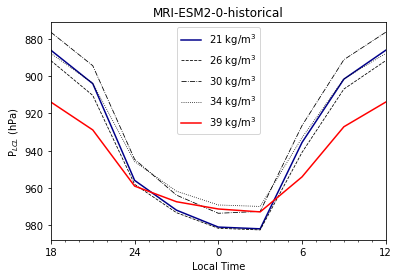

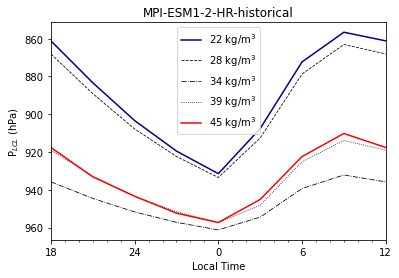

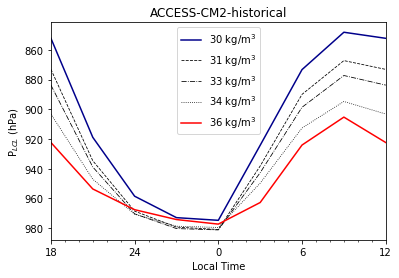

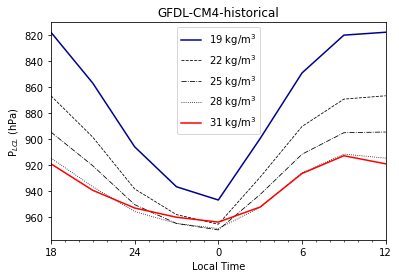

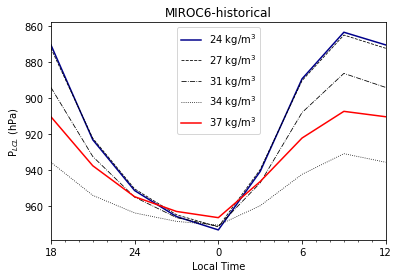

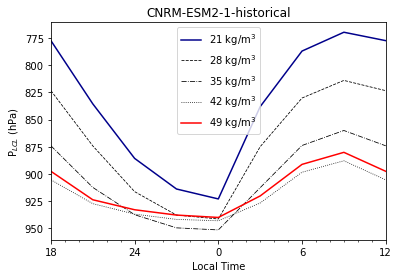

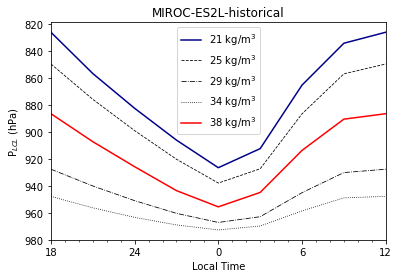

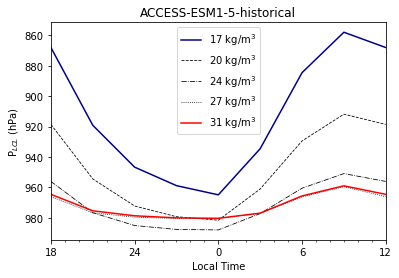

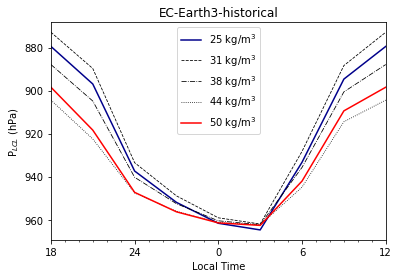

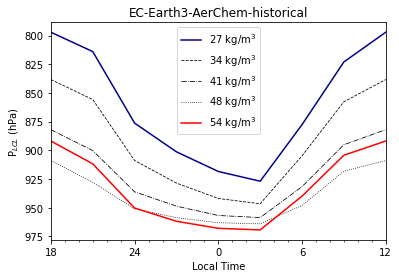

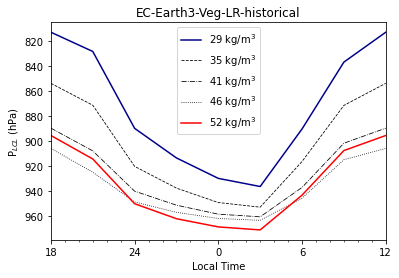

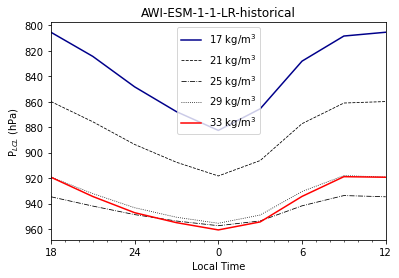

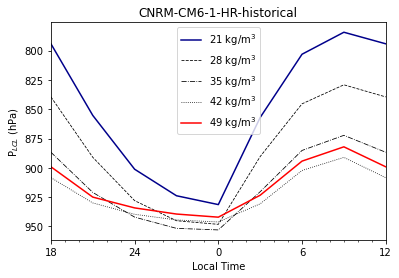

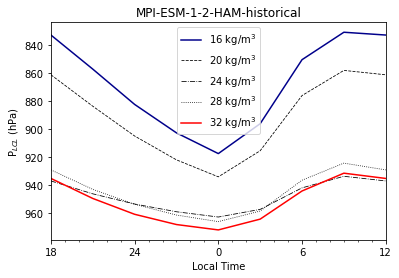

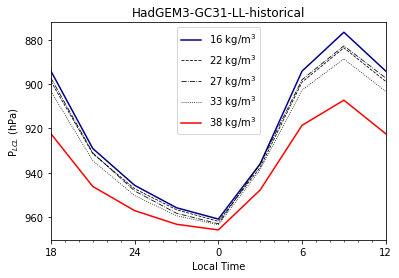

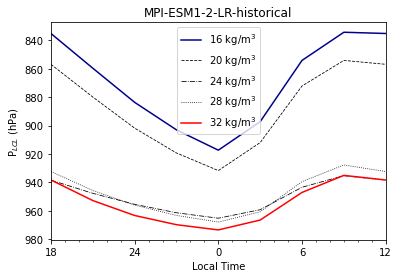

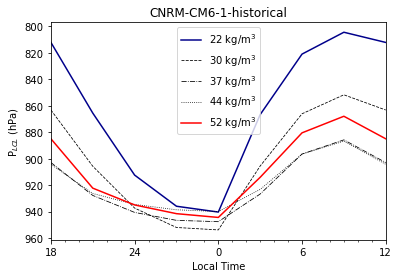

In [17]:
# make a bunch of figure 10's and save them in the "figures" directory
for file in files:
    try:
        # make_betts_fig10(file, save_loc="./figures") # this plots and saves the figure
        make_betts_fig10(file, save_loc="./figures") # this just plots it
    except ValueError:
        print(f"{file} failed to plot")

In [5]:
# similar process for fig 11
file_path = Path("data/")
files = list(file_path.glob("*fig11*"))

CNRM-ESM2-1-historical


/srv/conda/envs/notebook/lib/python3.9/site-packages/metpy/calc/thermo.py:1078: UserWarning: Relative humidity >120%, ensure proper units.
  warnings.warn('Relative humidity >120%, ensure proper units.')


BCC-CSM2-MR-historical
data/BCC-CSM2-MR-historical-fig11.nc failed to plot
CMCC-CM2-SR5-historical


/srv/conda/envs/notebook/lib/python3.9/site-packages/metpy/calc/thermo.py:1078: UserWarning: Relative humidity >120%, ensure proper units.
  warnings.warn('Relative humidity >120%, ensure proper units.')


data/CMCC-CM2-SR5-historical-fig11.nc failed to plot
MPI-ESM1-2-LR-historical


/srv/conda/envs/notebook/lib/python3.9/site-packages/metpy/calc/thermo.py:1078: UserWarning: Relative humidity >120%, ensure proper units.
  warnings.warn('Relative humidity >120%, ensure proper units.')


EC-Earth3-AerChem-historical


/srv/conda/envs/notebook/lib/python3.9/site-packages/metpy/calc/thermo.py:1078: UserWarning: Relative humidity >120%, ensure proper units.
  warnings.warn('Relative humidity >120%, ensure proper units.')


GFDL-CM4-piControl
data/GFDL-CM4-piControl-fig11.nc failed to plot
GFDL-CM4-historical


/srv/conda/envs/notebook/lib/python3.9/site-packages/metpy/calc/thermo.py:1078: UserWarning: Relative humidity >120%, ensure proper units.
  warnings.warn('Relative humidity >120%, ensure proper units.')


data/GFDL-CM4-historical-fig11.nc failed to plot
KACE-1-0-G-historical
data/KACE-1-0-G-historical-fig11.nc failed to plot
EC-Earth3-historical


/srv/conda/envs/notebook/lib/python3.9/site-packages/metpy/calc/thermo.py:1078: UserWarning: Relative humidity >120%, ensure proper units.
  warnings.warn('Relative humidity >120%, ensure proper units.')


data/EC-Earth3-historical-fig11.nc failed to plot
AWI-ESM-1-1-LR-historical


/srv/conda/envs/notebook/lib/python3.9/site-packages/metpy/calc/thermo.py:1078: UserWarning: Relative humidity >120%, ensure proper units.
  warnings.warn('Relative humidity >120%, ensure proper units.')


CNRM-CM6-1-historical


/srv/conda/envs/notebook/lib/python3.9/site-packages/metpy/calc/thermo.py:1078: UserWarning: Relative humidity >120%, ensure proper units.
  warnings.warn('Relative humidity >120%, ensure proper units.')


HadGEM3-GC31-LL-historical
MPI-ESM-1-2-HAM-historical


/srv/conda/envs/notebook/lib/python3.9/site-packages/metpy/calc/thermo.py:1078: UserWarning: Relative humidity >120%, ensure proper units.
  warnings.warn('Relative humidity >120%, ensure proper units.')


MPI-ESM1-2-HR-historical
CanESM5-historical


/srv/conda/envs/notebook/lib/python3.9/site-packages/metpy/calc/thermo.py:1078: UserWarning: Relative humidity >120%, ensure proper units.
  warnings.warn('Relative humidity >120%, ensure proper units.')


ACCESS-ESM1-5-historical


/srv/conda/envs/notebook/lib/python3.9/site-packages/metpy/calc/thermo.py:1078: UserWarning: Relative humidity >120%, ensure proper units.
  warnings.warn('Relative humidity >120%, ensure proper units.')


ACCESS-CM2-historical
CNRM-CM6-1-HR-historical


/srv/conda/envs/notebook/lib/python3.9/site-packages/metpy/calc/thermo.py:1078: UserWarning: Relative humidity >120%, ensure proper units.
  warnings.warn('Relative humidity >120%, ensure proper units.')


CMCC-ESM2-historical


/srv/conda/envs/notebook/lib/python3.9/site-packages/metpy/calc/thermo.py:1078: UserWarning: Relative humidity >120%, ensure proper units.
  warnings.warn('Relative humidity >120%, ensure proper units.')


data/CMCC-ESM2-historical-fig11.nc failed to plot


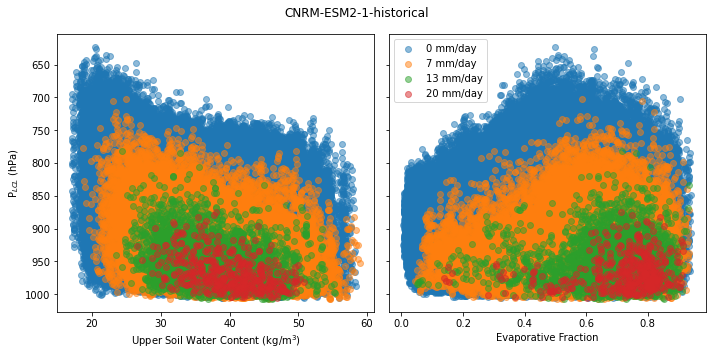

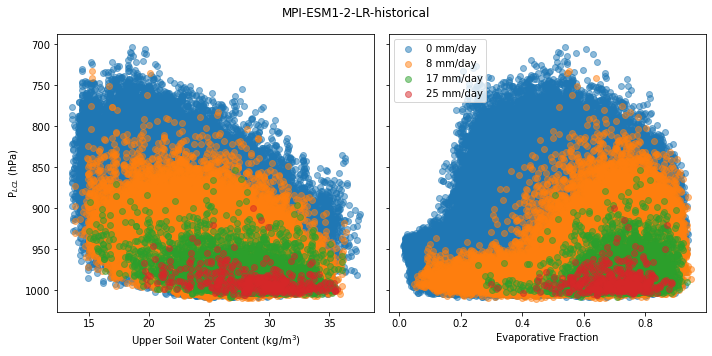

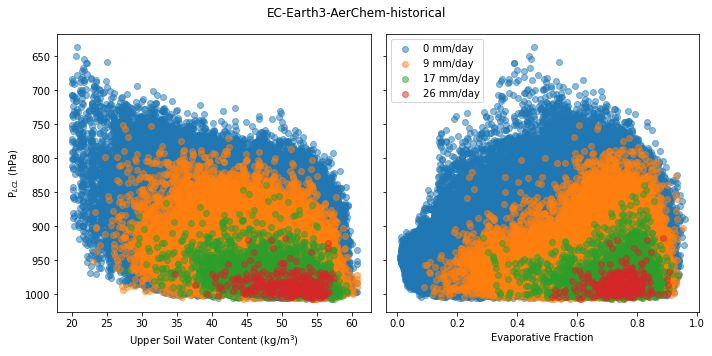

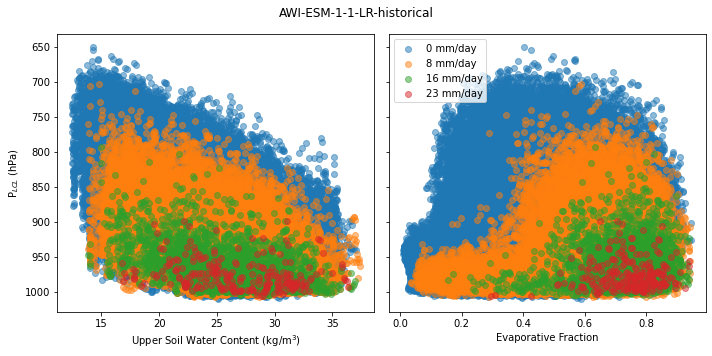

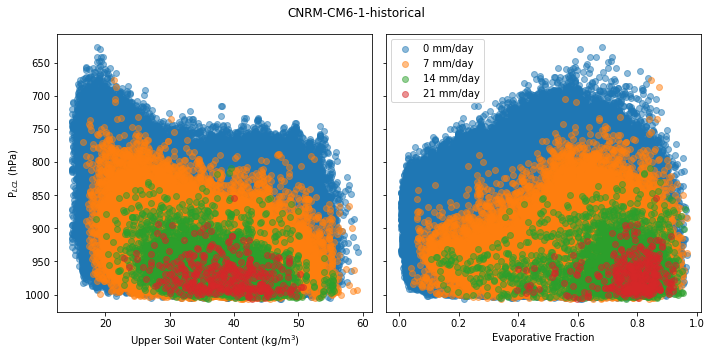

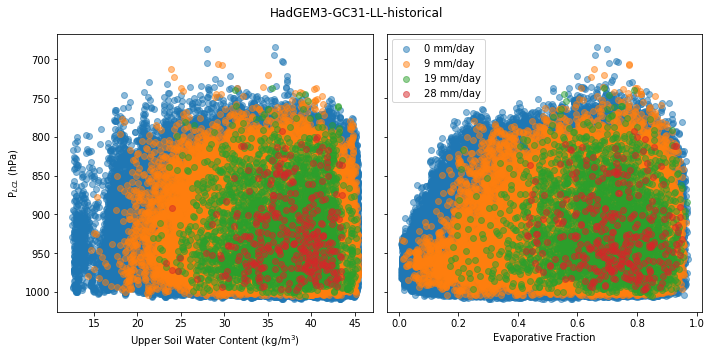

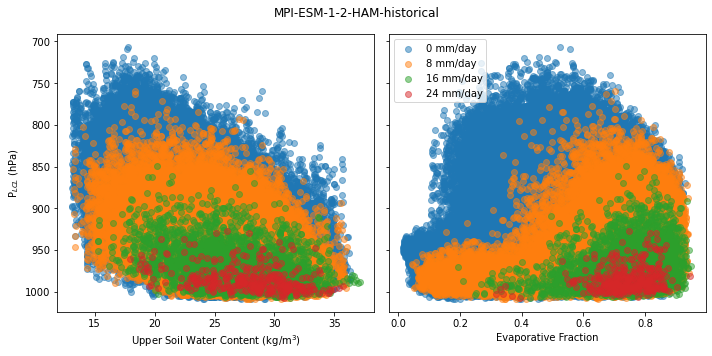

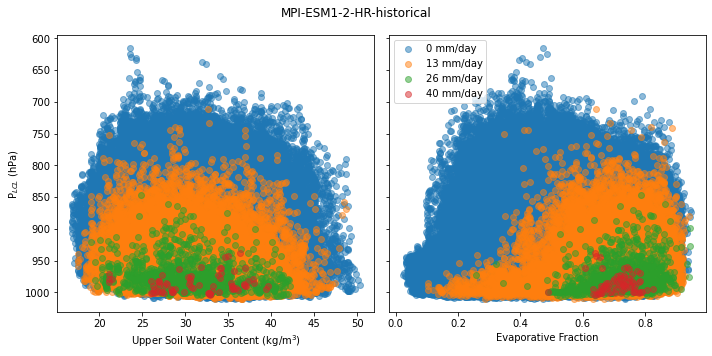

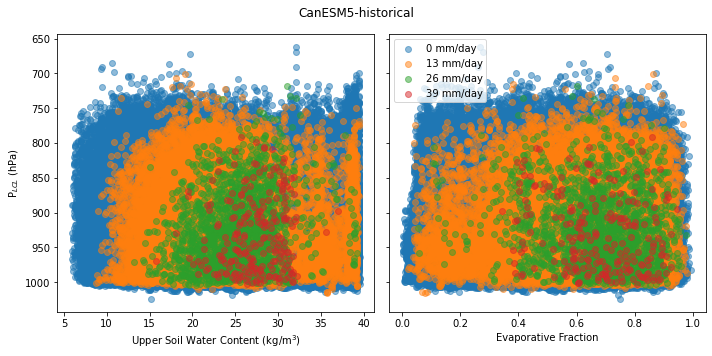

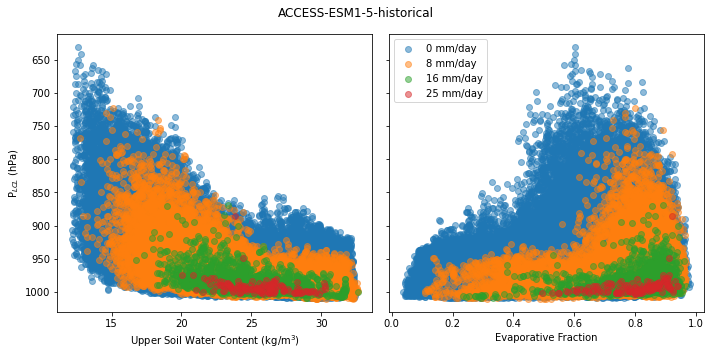

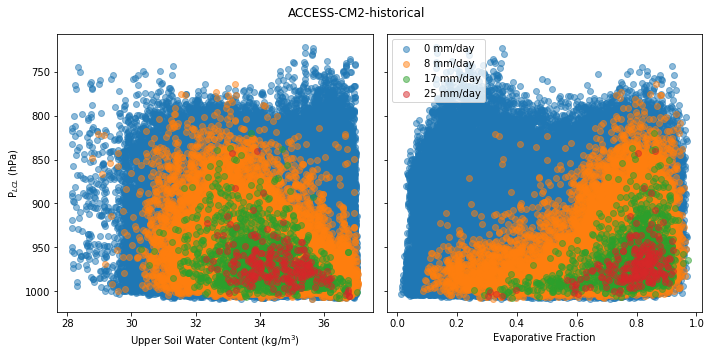

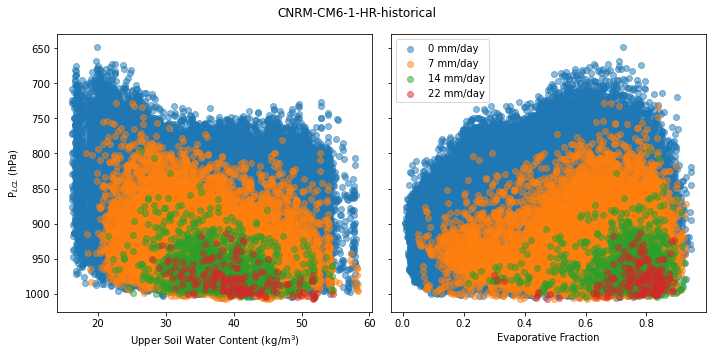

In [6]:
# make a bunch of figure 11's and save to "figures" dir
for file in files:
    try:
        #make_betts_fig11(file, save_loc="./figures") # this plots and saves the figure
        make_betts_fig11(file) # this just plots it
        
    except ValueError:
        print(f"{file} failed to plot")